# Swing spring application

Finally, an application is done for the swing spring problem.

In [1]:
from basecode import *

From [9], the model is, given $m, k, l$ and $g$,

$$
  \dot{\theta} = \frac{\rho_\theta}{mr^2}\\
  \dot{\rho_\theta} = -mgr \sin{\theta}\\
  \dot{r} = \frac{\rho_r}{m} \\
  \dot{\rho_r} = \frac{\rho^2_\theta}{mr^3} - k(r - l) + mg \cos{\theta}.
$$

In matrix form,

$$
  \frac{d}{dt}\begin{bmatrix}
              \theta\\
              \rho_\theta\\
              r\\
              \rho_r
              \end{bmatrix}
  =
  \begin{bmatrix}
  0 & \frac{1}{ml^2} & 0 & 0\\
  -mgl & 0 & 0 & 0\\
  0 & 0 & 0 & \frac{1}{m}\\
  0 & 0 & -k & 0
  \end{bmatrix}
  \begin{bmatrix}
  \theta\\
  \rho_\theta\\
  r\\
  \rho_r
  \end{bmatrix}
  +
  \begin{bmatrix}
  \frac{\rho_\theta}{m} \left(\frac{1}{r^2}-\frac{1}{l^2}\right)\\
  -mg(r\sin{\theta}-l\theta)\\
  0\\
  \frac{\rho^2_\theta}{mr^3} + kl + mg \cos{\theta}
  \end{bmatrix}.
$$

For $m = 1, l = 1, g = \pi^2, k = 100 \pi^2$, using the etd3rk method deduced, the best one tested,

In [2]:
def g_swing_spring(x, t):
  m = 1
  l = 1
  gr = np.pi**2
  k = 100 * np.pi**2
  vector = np.zeros(x.size)
  theta = x[0]
  p_theta = x[1]
  r = x[2]
  pr = x[3]
  vector[0] = p_theta/m * (1/r**2 - 1/l**2)
  vector[1] = -m*gr*(r*np.sin(theta)-l*theta)
  vector[3] = p_theta**2/(m*r**3) + k*l + m*gr*np.cos(theta)
  return vector

/tmp/ipykernel_12326/2307441015.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  vector[0] = p_theta/m * (1/r**2 - 1/l**2)
/tmp/ipykernel_12326/2307441015.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  vector[1] = -m*gr*(r*np.sin(theta)-l*theta)
/tmp/ipykernel_12326/2307441015.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  vector[3] = p_theta**2/(m*r**3) + k*l + m*gr*np.cos(theta)


/home/miki/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


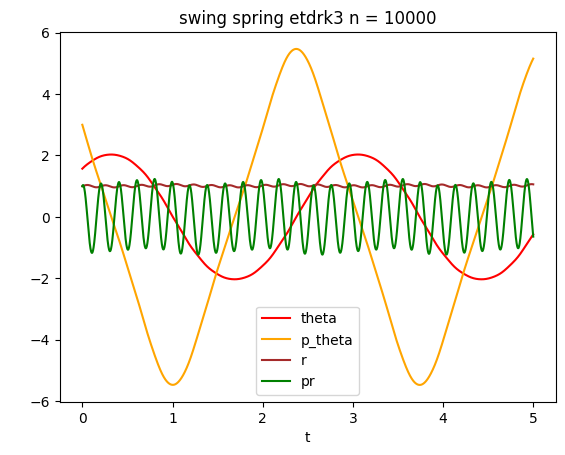

In [3]:
m = 1
l = 1
g = np.pi**2
k = 100 * np.pi**2
A = np.matrix([[0,-1/(m*l**2),0,0], [m*g*l,0,0,0], [0,0,0,-1/m], [0,0,k,0]])
n = 10000
t0 = 0.0
tf = 5.0
x0 = np.array([np.pi/2,3,l,1])
domains = 4*[np.arange(t0, tf, (tf-t0)/n)]
x = etd3rk_similar(t0, tf, n, x0, A, g_swing_spring)
names = ['theta','p_theta', 'r', 'pr']
matrix1 = [x[0,:], x[1,:], x[2,:], x[3,:]]

fig1, ax1 = graphic_2D(domains, matrix1, names, 't', ' ', 'swing spring etdrk3 n = '+str(n), False, False)